In [1]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.applications.resnet import ResNet50
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

In [2]:
batch_size = 32
epochs = 50
target_size = (256, 256)
folder_name = "testcovid"
directory = f"../Datasets/{folder_name}/Splitted_Dataset"

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=50,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2,
)

test_datagen = ImageDataGenerator(rescale=1/255.)
# validation_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
    directory=f"{directory}/train",
    batch_size=batch_size,
    class_mode='categorical',
    target_size=target_size,
    subset="training",
)

test_generator = test_datagen.flow_from_directory(
    directory=f"{directory}/test",
    batch_size=batch_size,
    class_mode="categorical",
    target_size=target_size,
)

validation_generator = train_datagen.flow_from_directory(
    # directory=f"{directory}/val",
    directory=f"{directory}/train",
    batch_size=batch_size,
    class_mode="categorical",
    target_size=target_size,
    subset="validation",
)

Found 544 images belonging to 2 classes.
Found 172 images belonging to 2 classes.
Found 136 images belonging to 2 classes.


# DenseNet Model

In [3]:
DenseNetBase = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224,3))

layer = DenseNetBase.output
layer = GlobalAveragePooling2D()(layer)

layer = Dense(1024, activation='relu', kernel_initializer='he_normal')(layer)

DenseNetPreds = Dense(2, activation='softmax')(layer)

DenseNetModel = Model(inputs=DenseNetBase.input, outputs=DenseNetPreds)

print(f"Toplam DenseNet katman sayısı: {len(DenseNetModel.layers)}")

Toplam DenseNet katman sayısı: 430


In [4]:
for layer in DenseNetBase.layers:
    layer.trainable = False

for layer in DenseNetBase.layers[-75:]:
    layer.trainable = True

DenseNetModel.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
DenseNetModel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [5]:
DenseNetHistory = DenseNetModel.fit(
    x=train_generator, validation_data=validation_generator, epochs=epochs
)

Epoch 1/50
17/17 [==============================] - 26s 1s/step - loss: 0.7722 - accuracy: 0.5055 - val_loss: 0.9878 - val_accuracy: 0.4779
Epoch 2/50
17/17 [==============================] - 19s 1s/step - loss: 0.7611 - accuracy: 0.5221 - val_loss: 0.8828 - val_accuracy: 0.4926
Epoch 3/50
17/17 [==============================] - 19s 1s/step - loss: 0.7537 - accuracy: 0.5055 - val_loss: 0.8631 - val_accuracy: 0.4706
Epoch 4/50
17/17 [==============================] - 20s 1s/step - loss: 0.7488 - accuracy: 0.5037 - val_loss: 0.8258 - val_accuracy: 0.4706
Epoch 5/50
17/17 [==============================] - 20s 1s/step - loss: 0.7330 - accuracy: 0.5331 - val_loss: 0.7739 - val_accuracy: 0.4853
Epoch 6/50
17/17 [==============================] - 19s 1s/step - loss: 0.7228 - accuracy: 0.5368 - val_loss: 0.7811 - val_accuracy: 0.4632
Epoch 7/50
17/17 [==============================] - 19s 1s/step - loss: 0.7311 - accuracy: 0.5441 - val_loss: 0.7249 - val_accuracy: 0.5441
Epoch 8/50
17/17 [==

In [ ]:
"""
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="max",
    baseline=None,
    restore_best_weights=True,
)
DenseNetHistory2 = DenseNetModel.fit(
    x=train_generator, validation_data=validation_generator, epochs=10, callbacks=[early_stopping]
)
"""

In [6]:
DenseNetModel.evaluate(test_generator)

6/6 [==============================] - 4s 587ms/step - loss: 0.6197 - accuracy: 0.6977


[0.6197171807289124, 0.6976743936538696]

# ResNet

In [7]:
ResNetBase = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

layer2 = ResNetBase.output

layer2 = GlobalAveragePooling2D()(layer2)

layer2 = Dense(1024, activation='relu')(layer2)

ResNetPreds = Dense(2, activation='softmax')(layer2)

ResNetModel = Model(inputs=ResNetBase.input, outputs=ResNetPreds)

print(f"Toplam ResNet katman sayısı: {len(ResNetModel.layers)}")

Toplam ResNet katman sayısı: 178


In [8]:
for layer in ResNetBase.layers:
    layer.trainable = False

for layer in ResNetBase.layers[-30:]:
    layer.trainable = True

ResNetModel.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])

ResNetModel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [9]:
ResNetHistory = ResNetModel.fit(
    x=train_generator, validation_data=validation_generator, epochs=epochs
)

Epoch 1/50
17/17 [==============================] - 23s 1s/step - loss: 0.6976 - accuracy: 0.5239 - val_loss: 0.7380 - val_accuracy: 0.5000
Epoch 2/50
17/17 [==============================] - 19s 1s/step - loss: 0.6859 - accuracy: 0.5551 - val_loss: 0.7262 - val_accuracy: 0.5000
Epoch 3/50
13/17 [=====================>........] - ETA: 3s - loss: 0.6847 - accuracy: 0.5505

KeyboardInterrupt: 

# ResNet

In [ ]:
ResNetModel.evaluate(test_generator)

# Xception

In [10]:
XceptionBase = Xception(weights='imagenet', include_top=False, input_shape=(256,256,3))

layer3 = XceptionBase.output
layer3 = GlobalAveragePooling2D()(layer3)

layer3 = Dense(128, activation='relu')(layer3)

XceptionPreds = Dense(2, activation='softmax')(layer3)

XceptionModel = Model(inputs=XceptionBase.input, outputs=XceptionPreds)

print(f"Xception katman sayısı: {len(XceptionModel.layers)}")

Xception katman sayısı: 135


In [11]:
for layer in XceptionBase.layers:
    layer.trainable = False

for layer in XceptionBase.layers[-20:]:
    layer.trainable = True

XceptionModel.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
XceptionModel.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                           

In [12]:
XceptionHistory = XceptionModel.fit(x = train_generator, validation_data = validation_generator, epochs = epochs)

Epoch 1/50
17/17 [==============================] - 22s 1s/step - loss: 0.6921 - accuracy: 0.5349 - val_loss: 0.7231 - val_accuracy: 0.4338
Epoch 2/50
17/17 [==============================] - 20s 1s/step - loss: 0.6903 - accuracy: 0.5221 - val_loss: 0.7114 - val_accuracy: 0.4485
Epoch 3/50
17/17 [==============================] - 19s 1s/step - loss: 0.6915 - accuracy: 0.5368 - val_loss: 0.6943 - val_accuracy: 0.5074
Epoch 4/50
17/17 [==============================] - 20s 1s/step - loss: 0.6908 - accuracy: 0.5184 - val_loss: 0.7002 - val_accuracy: 0.4412
Epoch 5/50
17/17 [==============================] - 20s 1s/step - loss: 0.6910 - accuracy: 0.5202 - val_loss: 0.7134 - val_accuracy: 0.4706
Epoch 6/50
17/17 [==============================] - 20s 1s/step - loss: 0.6899 - accuracy: 0.5515 - val_loss: 0.6972 - val_accuracy: 0.5294
Epoch 7/50
17/17 [==============================] - 19s 1s/step - loss: 0.6906 - accuracy: 0.5129 - val_loss: 0.6941 - val_accuracy: 0.5294
Epoch 8/50
17/17 [==

In [13]:
XceptionModel.evaluate(test_generator)

6/6 [==============================] - 4s 651ms/step - loss: 0.6739 - accuracy: 0.6453


[0.6738805770874023, 0.645348846912384]

# VGG16

In [14]:
VGG16Base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

layer4 = VGG16Base.output
layer4 = GlobalAveragePooling2D()(layer4)
layer4 = Dense(1024, activation='relu')(layer4)
VGG16Preds = Dense(2, activation='softmax')(layer4)

VGG16Model = Model(inputs=VGG16Base.input, outputs=VGG16Preds)
print(f"Toplam ResNet katman sayısı: {len(VGG16Model.layers)}")

Toplam ResNet katman sayısı: 22


In [16]:
for layer in VGG16Base.layers:
    layer.trainable = False

for layer in VGG16Base.layers[-7:]:
    layer.trainable = True

VGG16Model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
VGG16Model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [17]:
VGG16History = VGG16Model.fit(x = train_generator, validation_data = validation_generator, epochs = epochs)

Epoch 1/50
17/17 [==============================] - 26s 1s/step - loss: 268.9514 - accuracy: 0.5074 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/50
17/17 [==============================] - 19s 1s/step - loss: 0.6934 - accuracy: 0.4926 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/50
17/17 [==============================] - 20s 1s/step - loss: 0.6935 - accuracy: 0.4853 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/50
17/17 [==============================] - 20s 1s/step - loss: 0.6933 - accuracy: 0.4669 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/50
17/17 [==============================] - 20s 1s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/50
17/17 [==============================] - 20s 1s/step - loss: 0.6934 - accuracy: 0.4890 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
17/17 [==============================] - 20s 1s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/50
17/17 [

KeyboardInterrupt: 

In [ ]:
VGG16Model.evaluate(test_generator)

# InceptionV3

In [18]:
InceptionBase = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

layer5 = InceptionBase.output
layer5 = GlobalAveragePooling2D()(layer5)
layer5 = Dense(1024, activation='relu')(layer5)
InceptionPreds = Dense(2, activation='softmax')(layer5)

InceptionModel = Model(inputs=InceptionBase.input, outputs=InceptionPreds)
print(f"Toplam ResNet katman sayısı: {len(InceptionModel.layers)}")

Toplam ResNet katman sayısı: 314


In [19]:
for layer in InceptionBase.layers:
    layer.trainable = False

for layer in InceptionBase.layers[-100:]:
    layer.trainable = True

InceptionModel.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
InceptionModel.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 149, 149, 32  96         ['conv2d_4[0][0]']               
 rmalization)                   )                                                           

In [20]:
InceptionHistory = InceptionModel.fit(x = train_generator, validation_data = validation_generator, epochs = epochs)

Epoch 1/50
17/17 [==============================] - 25s 1s/step - loss: 0.7072 - accuracy: 0.5349 - val_loss: 0.6808 - val_accuracy: 0.5956
Epoch 2/50
17/17 [==============================] - 21s 1s/step - loss: 0.6299 - accuracy: 0.6544 - val_loss: 0.7263 - val_accuracy: 0.5515
Epoch 3/50
17/17 [==============================] - 19s 1s/step - loss: 0.6078 - accuracy: 0.6673 - val_loss: 0.6291 - val_accuracy: 0.6544
Epoch 4/50
17/17 [==============================] - 19s 1s/step - loss: 0.5751 - accuracy: 0.6930 - val_loss: 0.5988 - val_accuracy: 0.6985
Epoch 5/50
17/17 [==============================] - 20s 1s/step - loss: 0.5358 - accuracy: 0.7592 - val_loss: 0.5975 - val_accuracy: 0.7353
Epoch 6/50
17/17 [==============================] - 20s 1s/step - loss: 0.5367 - accuracy: 0.7335 - val_loss: 0.6342 - val_accuracy: 0.6912
Epoch 7/50
17/17 [==============================] - 19s 1s/step - loss: 0.5282 - accuracy: 0.7279 - val_loss: 0.6678 - val_accuracy: 0.6765
Epoch 8/50
17/17 [==

In [21]:
InceptionModel.evaluate(test_generator)

6/6 [==============================] - 4s 585ms/step - loss: 0.9820 - accuracy: 0.7035


[0.9820427298545837, 0.7034883499145508]

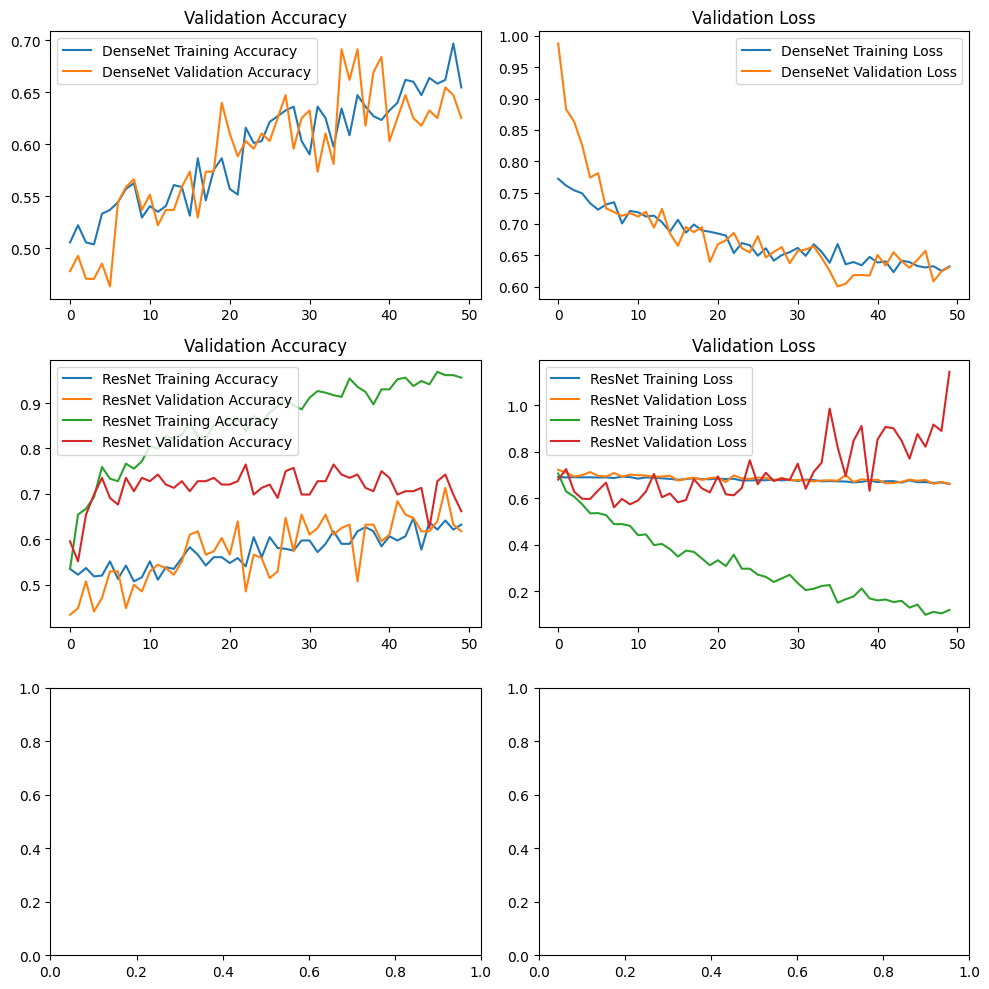

In [22]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# plt.suptitle("DenseNet - 100 Katman, ResNet - 10 Katman, Xception - 35 Katman Açık, AdaDelta Optimizer, Özel Epoch")

axs[0, 0].plot(DenseNetHistory.history['accuracy'], label='DenseNet Training Accuracy')
axs[0, 0].set_title('Training Accuracy')
axs[0, 0].legend()
axs[0, 0].plot(DenseNetHistory.history['val_accuracy'], label='DenseNet Validation Accuracy')
axs[0, 0].set_title('Validation Accuracy')
axs[0, 0].legend()

axs[0, 1].plot(DenseNetHistory.history['loss'], label='DenseNet Training Loss')
axs[0, 1].set_title('Training Loss')
axs[0, 1].legend()
axs[0, 1].plot(DenseNetHistory.history['val_loss'], label='DenseNet Validation Loss')
axs[0, 1].set_title('Validation Loss')
axs[0, 1].legend()

axs[1, 0].plot(XceptionHistory.history['accuracy'], label='ResNet Training Accuracy')
axs[1, 0].set_title('Training Accuracy')
axs[1, 0].legend()
axs[1, 0].plot(XceptionHistory.history['val_accuracy'], label='ResNet Validation Accuracy')
axs[1, 0].set_title('Validation Accuracy')
axs[1, 0].legend()

axs[1, 1].plot(XceptionHistory.history['loss'], label='ResNet Training Loss')
axs[1, 1].set_title('Training Loss')
axs[1, 1].legend()
axs[1, 1].plot(XceptionHistory.history['val_loss'], label='ResNet Validation Loss')
axs[1, 1].set_title('Validation Loss')
axs[1, 1].legend()

axs[2, 0].plot(InceptionHistory.history['accuracy'], label='ResNet Training Accuracy')
axs[2, 0].set_title('Training Accuracy')
axs[2, 0].legend()
axs[2, 0].plot(InceptionHistory.history['val_accuracy'], label='ResNet Validation Accuracy')
axs[2, 0].set_title('Validation Accuracy')
axs[2, 0].legend()

axs[2, 1].plot(InceptionHistory.history['loss'], label='ResNet Training Loss')
axs[2, 1].set_title('Training Loss')
axs[2, 1].legend()
axs[2, 1].plot(InceptionHistory.history['val_loss'], label='ResNet Validation Loss')
axs[2, 1].set_title('Validation Loss')
axs[2, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
import os
from datetime import datetime
from nbconvert import HTMLExporter

folder_path = f"..\\Results\\{folder_name}"

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

current_time = datetime.now().strftime("%H.%M_%d.%m.%Y")

html_filename = f"{current_time}.html"
html_file_path = os.path.join(folder_path, html_filename)

notebook_filename = "main_project.ipynb"
exporter = HTMLExporter()
output, _ = exporter.from_filename(notebook_filename)

with open(html_file_path, 'w', encoding='utf-8') as f:
    f.write(output)

print(f"Notebook saved to {folder_path} as {html_filename}")